# 단계적 변수 추출 - Factor Anaylisis

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
import platform #운영 체제 
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False 

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path="c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system')

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, FactorAnalysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer import FactorAnalyzer
from factor_analyzer import analyze

# load data

In [4]:
climate = pd.read_csv('../data/adjusted_climate.csv', encoding='utf-8')
output=pd.read_csv('../data/onion_unit_output.csv', encoding = 'utf-8')

In [5]:
climate.head(3)

,year_local,area,year,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,...,순간최대풍속 9월,순간최대풍속 10월,순간최대풍속 11월,순간최대풍속 12월,순간최대풍속 1월,순간최대풍속 2월,순간최대풍속 3월,순간최대풍속 4월,순간최대풍속 5월,순간최대풍속 6월
0,1991_강원도,강원도,1991,22.827957,24.297133,18.242593,11.864875,7.723704,-1.206093,-4.854480,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1991_경기도,경기도,1991,25.051613,25.911828,20.493023,13.147312,8.160000,-0.915054,-4.255914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1991_경상남도,경상남도,1991,26.101075,27.240502,21.902222,15.447670,11.091111,3.099642,1.022581,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
output.head(3)

,year_local,area,year,10a당 생산량 (kg)
0,1981_부산광역시,부산광역시,1981,-
1,1982_부산광역시,부산광역시,1982,-
2,1983_부산광역시,부산광역시,1983,3800


In [7]:
output.replace('-',np.nan,inplace=True)
output.dropna(inplace=True)
output

,year_local,area,year,10a당 생산량 (kg)
2,1983_부산광역시,부산광역시,1983,3800
4,1985_부산광역시,부산광역시,1985,4093
6,1987_부산광역시,부산광역시,1987,4339
7,1988_부산광역시,부산광역시,1988,5033
8,1989_부산광역시,부산광역시,1989,5099
...,...,...,...,...
580,2015_제주도,제주도,2015,6552
581,2016_제주도,제주도,2016,6458
582,2017_제주도,제주도,2017,6945
583,2018_제주도,제주도,2018,6740


# merge climate and output data into one df 

In [8]:
df = pd.merge(climate,
              output,
              on=['year_local','area','year'])
df = df.iloc[:,3:]
df

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,순간최대풍속 10월,순간최대풍속 11월,순간최대풍속 12월,순간최대풍속 1월,순간최대풍속 2월,순간최대풍속 3월,순간최대풍속 4월,순간최대풍속 5월,순간최대풍속 6월,10a당 생산량 (kg)
0,22.827957,24.297133,18.242593,11.864875,7.723704,-1.206093,-4.854480,-2.994444,2.805018,10.331852,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4061
1,25.051613,25.911828,20.493023,13.147312,8.160000,-0.915054,-4.255914,-1.811905,4.422581,11.940000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4061
2,26.101075,27.240502,21.902222,15.447670,11.091111,3.099642,1.022581,1.350794,6.797849,12.648519,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5121
3,24.853666,26.011144,20.131818,13.698534,9.552424,1.166276,-1.537243,-0.499675,4.974194,11.554545,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6300
4,25.419355,28.261290,22.693333,17.974194,13.870000,5.900000,3.158065,3.353571,8.335484,13.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,26.406048,26.978455,21.398333,14.785887,9.688333,4.221023,1.875893,3.102232,7.900446,11.381696,...,9.811694,7.856667,10.423864,10.804018,10.716518,12.120982,9.909375,9.979435,8.046250,6873
419,26.887500,27.388710,20.442917,12.579839,6.805000,1.428977,-0.809375,1.659375,6.600000,11.473661,...,7.349597,5.769583,6.481818,6.341964,6.934821,8.884375,7.380357,7.684274,6.426582,7957
420,25.447312,28.087097,23.584444,17.760215,14.137778,9.384848,6.883333,7.928571,10.902381,14.417857,...,10.611828,8.973333,11.909091,11.352381,10.565476,11.692857,9.042857,8.007527,7.308889,7875
421,24.305161,27.466452,20.138667,12.011613,7.014000,0.330909,-1.005714,0.845714,6.144286,11.113571,...,7.002581,5.654667,6.339091,6.110714,6.544286,8.260000,7.385000,7.576129,6.124000,5500


# confirm if dtype is float for future modeling

In [9]:
df.dtypes

평균기온 7월          float64
평균기온 8월          float64
평균기온 9월          float64
평균기온 10월         float64
평균기온 11월         float64
                  ...   
순간최대풍속 3월        float64
순간최대풍속 4월        float64
순간최대풍속 5월        float64
순간최대풍속 6월        float64
10a당 생산량 (kg)     object
Length: 121, dtype: object

# Scaling

In [10]:
df_columns = df.columns.tolist()

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, 
                         columns = df_columns)
df_scaled

,평균기온 7월,평균기온 8월,평균기온 9월,평균기온 10월,평균기온 11월,평균기온 12월,평균기온 1월,평균기온 2월,평균기온 3월,평균기온 4월,...,순간최대풍속 10월,순간최대풍속 11월,순간최대풍속 12월,순간최대풍속 1월,순간최대풍속 2월,순간최대풍속 3월,순간최대풍속 4월,순간최대풍속 5월,순간최대풍속 6월,10a당 생산량 (kg)
0,0.390530,0.536933,0.297459,0.151368,0.437209,0.288114,0.219891,0.049930,0.065685,0.316907,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.433497
1,0.574046,0.693454,0.539888,0.275519,0.470633,0.306915,0.257361,0.140811,0.238171,0.501900,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.433497
2,0.660656,0.822250,0.691695,0.498214,0.695182,0.566260,0.587797,0.383871,0.491455,0.583404,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.546648
3,0.557709,0.703081,0.500977,0.328882,0.577305,0.441367,0.427551,0.241659,0.296992,0.457559,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.672502
4,0.604395,0.921201,0.776918,0.742803,0.908069,0.747161,0.721479,0.537789,0.655419,0.652595,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.509180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,0.685825,0.796848,0.637413,0.434147,0.587717,0.638700,0.641215,0.518473,0.609029,0.437676,...,0.804822,0.562261,0.661189,0.673757,0.740164,0.817827,0.742832,0.842490,0.750816,0.733668
419,0.725559,0.836617,0.534490,0.220583,0.366828,0.458337,0.473116,0.407586,0.470358,0.448255,...,0.602864,0.412900,0.411144,0.395496,0.478971,0.599446,0.553250,0.648727,0.599681,0.849381
420,0.606702,0.904315,0.872914,0.722088,0.928584,0.972279,0.954682,0.889388,0.929136,0.786939,...,0.870455,0.642176,0.755398,0.707954,0.729732,0.788940,0.677875,0.676017,0.682011,0.840628
421,0.512442,0.844153,0.501715,0.165574,0.382840,0.387403,0.460825,0.345055,0.421763,0.406832,...,0.574400,0.404676,0.402091,0.381075,0.451998,0.557319,0.553598,0.639597,0.571446,0.587105


# X, y 분리

In [11]:
X = df_scaled.iloc[:,:-1]
y = df_scaled.iloc[:,-1]
print("X: {0}\ny: {1}".format(X.shape,
                              y.shape))

X: (423, 120)
y: (423,)


# Factor Analysis 적용

## FA 적용 가능 여부 판단

#### Adequency Test: KMO should be btw 0 and 1, and more than 0.6

In [12]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model=calculate_kmo(X)

In [13]:
kmo_model

nan

#### Adequency Test: p-value should be less than 0.05 (statistically significant)

In [14]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

(nan, nan)

#### 잠정적 이유 1: df에 nan이 있거나 모든 컬럼이 0인 값 있음 
#### 잠정적 이유 2: correlation이 1 이나 -1인 컬럼들 존재

### 모든 컬럼이 0인 값 제거 

In [15]:
zeros = []
for i in X.columns.tolist():
    if X[i].mean() == 0:
        zeros.append(i)
        
print(zeros)        

for i in zeros:
    X.drop(i, axis=1, inplace=True)

print(zeros)    

['적설량 7월', '적설량 8월', '적설량 9월', '적설량 10월', '적설량 5월', '적설량 6월']
['적설량 7월', '적설량 8월', '적설량 9월', '적설량 10월', '적설량 5월', '적설량 6월']


In [16]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_model

0.8879621358607785

In [17]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(X)
chi_square_value, p_value

(116322.51928586022, 0.0)

# Factor 개수 선택

In [18]:
# installed factor-analyzer-0.2.3
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.analyze(X, 25, rotation=None)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,27.377178
1,17.165242
2,11.449415
3,8.153931
4,5.388550
...,...
109,0.001372
110,0.001114
111,0.000800
112,0.000637


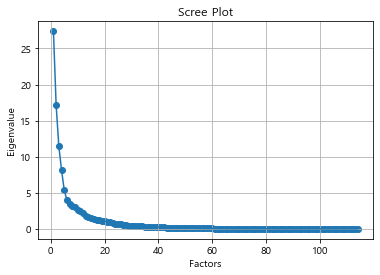

In [19]:
# Create scree plot using matplotlib
plt.scatter(range(1,X.shape[1]+1),ev)
plt.plot(range(1,X.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Number eigenvalues greater than 1 considered as the number of factors.

In [28]:
#ev.sort_values('Original_Eigenvalues').iloc[55:65,:]
# Factor를 적어도 46개 써야 적절함  --> 틀린 유추 

#ev_st = ev.sort_values('Original_Eigenvalues')
#ev_st[ev_st['Original_Eigenvalues'].gt(1)] --> 틀린 유추 

#아이젠 벨류가 1보다 넘는 값 중 가장 작은 factor 개수: 113개 
index_value = ev[(ev['Original_Eigenvalues'] - 1).apply(abs) > 0].sort_values('Original_Eigenvalues')
index_value

,Original_Eigenvalues
113,0.000530
112,0.000637
111,0.000800
110,0.001114
109,0.001372
...,...
4,5.388550
3,8.153931
2,11.449415
1,17.165242


In [21]:
# eigen value가 1과 가장 가까운 factor number의 인덱스: 20 
index_value = (ev['Original_Eigenvalues'] - 1).apply(abs).idxmin()
index_value

20

Eigenvalue > 1 Programs usually have a default cut-off for the number of generated factors, such as all factors with an eigenvalue of ≥1.

This is because a factor with an eigenvalue of 1 accounts for as much variance as a single variable, and the logic is that only factors that explain at least the same amount of variance as a single variable is worth keeping.

But often a cut-off of 1 results in more factors than the user bargained for or leaving out a theoretically important factor whose eigenvalue is just below 1. So use this criterion only with extreme caution

# Performing Factor Analysis

In [22]:
fa = FactorAnalyzer()
fa.analyze(X, 20, rotation="varimax")
analysis_df = fa.loadings

In [23]:
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20
평균기온 7월,0.114012,-0.035867,0.160713,0.773142,0.022985,0.102232,0.086736,-0.168723,-0.032080,0.449199,-0.052899,-0.104426,0.013574,-0.072038,-0.062300,-0.032179,-0.055465,-0.028824,-0.036811,-0.038232
평균기온 8월,0.279077,0.060097,0.183808,0.709107,0.124602,0.422972,-0.132359,-0.063794,0.081617,0.147692,-0.060229,-0.077984,0.032777,0.023519,-0.009966,-0.217701,-0.049697,-0.175377,-0.085650,-0.051076
평균기온 9월,0.610964,0.088958,0.239934,0.481189,0.223021,-0.086046,-0.165742,-0.109075,0.047083,0.005762,-0.063327,-0.207372,-0.064634,-0.131040,0.267520,0.137467,-0.033307,-0.119874,0.046532,-0.080984
평균기온 10월,0.813100,0.144749,0.196915,0.259351,0.078021,0.148601,-0.013551,-0.050096,0.106982,-0.107437,-0.092046,0.063497,-0.084010,-0.007261,0.023676,0.030437,-0.183236,-0.161328,-0.126700,0.060962
평균기온 11월,0.838919,0.098187,0.116277,0.031623,0.011758,-0.025187,0.021720,0.234181,0.026462,0.008784,-0.068983,0.073023,-0.055828,-0.316754,0.077187,-0.072464,0.196574,-0.055632,-0.015768,-0.062830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
순간최대풍속 2월,0.087902,0.933042,-0.038469,-0.047430,-0.016058,0.104563,0.028958,-0.031825,0.013117,-0.026545,0.009971,0.129645,-0.195848,0.006174,0.013169,0.094708,-0.052157,0.063645,0.121698,-0.050264
순간최대풍속 3월,0.037692,0.942477,-0.040920,0.002415,-0.030378,0.109825,0.085706,-0.087165,0.011327,-0.048798,0.016424,0.075515,-0.138034,-0.035327,0.011679,0.076614,-0.054617,-0.007875,0.146662,-0.010549
순간최대풍속 4월,-0.000568,0.938069,-0.031041,0.012441,-0.034218,0.089094,0.076948,-0.061095,0.016074,-0.069968,0.036300,0.110398,-0.153564,0.002623,0.024034,0.088855,-0.066413,0.001578,0.135280,-0.042215
순간최대풍속 5월,0.009723,0.945628,-0.018009,0.030725,-0.033902,0.114353,0.080709,-0.071830,0.019351,-0.076368,0.034685,0.067139,-0.153110,0.034909,-0.025743,0.065445,-0.069358,0.023481,0.123269,-0.020019


In [24]:
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7,Factor8,Factor9,Factor10,Factor11,Factor12,Factor13,Factor14,Factor15,Factor16,Factor17,Factor18,Factor19,Factor20
SS Loadings,17.56288,21.217553,12.997869,9.015571,4.933004,2.574808,2.865144,2.164262,3.650693,2.903282,2.728190,1.030776,1.634875,1.330122,2.010800,2.232106,1.780071,1.810015,1.753908,1.608842
Proportion Var,0.15406,0.186119,0.114016,0.079084,0.043272,0.022586,0.025133,0.018985,0.032024,0.025467,0.023931,0.009042,0.014341,0.011668,0.017639,0.019580,0.015615,0.015877,0.015385,0.014113
Cumulative Var,0.15406,0.340179,0.454196,0.533280,0.576552,0.599138,0.624270,0.643255,0.675279,0.700746,0.724678,0.733720,0.748061,0.759728,0.777367,0.796947,0.812561,0.828439,0.843824,0.857937


### 결과 해석

In [25]:
for i in analysis_df.columns.tolist():
    print(i, ':', analysis_df[analysis_df[i]>= 0.6].index.values)

Factor1 : ['평균기온 9월' '평균기온 10월' '평균기온 11월' '평균기온 12월' '평균기온 1월' '평균기온 2월' '평균기온 3월'
 '최고기온 11월' '최고기온 12월' '최고기온 1월' '최고기온 2월' '최저기온 9월' '최저기온 10월' '최저기온 11월'
 '최저기온 12월' '최저기온 1월' '최저기온 2월' '최저기온 3월' '최저기온 4월' '최저기온 5월']
Factor2 : ['운량 7월' '운량 8월' '운량 9월' '운량 10월' '운량 11월' '운량 12월' '운량 1월' '운량 2월'
 '운량 3월' '운량 4월' '운량 5월' '운량 6월' '순간최대풍속 7월' '순간최대풍속 8월' '순간최대풍속 9월'
 '순간최대풍속 10월' '순간최대풍속 11월' '순간최대풍속 12월' '순간최대풍속 1월' '순간최대풍속 2월'
 '순간최대풍속 3월' '순간최대풍속 4월' '순간최대풍속 5월' '순간최대풍속 6월']
Factor3 : ['일사량 7월' '일사량 8월' '일사량 9월' '일사량 10월' '일사량 11월' '일사량 12월' '일사량 1월'
 '일사량 2월' '일사량 3월' '일사량 4월' '일사량 5월' '일사량 6월']
Factor4 : ['평균기온 7월' '평균기온 8월' '평균기온 5월' '평균기온 6월' '최고기온 7월' '최고기온 8월' '최고기온 9월'
 '최고기온 5월' '최고기온 6월' '최저기온 7월' '최저기온 6월']
Factor5 : ['습도 7월' '습도 8월' '습도 9월' '습도 4월' '습도 5월' '습도 6월']
Factor6 : ['일조시간 8월']
Factor7 : ['일조시간 9월']
Factor8 : ['강수량 11월']
Factor9 : ['일조시간 12월' '일조시간 1월']
Factor10 : ['일조시간 7월']
Factor11 : ['적설량 2월' '적설량 3월' '적설량 4월']
Factor12 : []
Factor13 : []
Factor14 : []
Factor